<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/EjercicioIndividual_Clase15_Nov2__Sistemas_No_supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistemas No supervisados

**TRABAJO EN CLASE:**  Ejercicio con mi propio dataset

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import sys
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Pipeline es para el procesamiento y limpieza de las variables. Proceso continuo de transformacion de variables
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#Escalamiento
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_set/ClaseOct26_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Eliminaré columnas que no utilizaré para mi analisis
#Cuando elimino columnas, axis=1
df_variables=df_train.drop(["PassengerId","Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
df_variables

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


Obtenemos los estadísticos Descriptivos

In [ ]:
 df_variables.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Normanlizando todas las variables:
df_norm = (df_variables-df_variables.min())/(df_variables.max()-df_variables.min())
df_norm

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,NaN,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


In [ ]:
df_norm=df_norm.dropna()
print(df_norm.isnull().sum())

df_norm.describe()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.618347,0.367921,0.064076,0.071895,0.067719
std,0.419125,0.182540,0.116223,0.142215,0.103291
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.247612,0.000000,0.000000,0.015713
50%,0.500000,0.346569,0.000000,0.000000,0.030726
75%,1.000000,0.472229,0.125000,0.166667,0.065144
max,1.000000,1.000000,0.625000,1.000000,1.000000


**Busqueda de la cantidad óptimo de clusters:** 
Suponiendo que no tenemos un número óptimo de clusters.

In [ ]:
#PASO 1: Calcular qué tan similares son los individuos dentro de los clusters
#Utilizaremos un método de codo de Jambu
#Creará diferentes cantidades de clusters y calculará qué tan similares son los individuos dentro del cluster e ir plasmando esto en una gráfica:

#Mientras más similares sean estos, más distantes serán los clusters. Ese es el ideal: clusters bien separados

#WCSS: Sum of squared distance between each point and the centroid in a cluster

wcss = []

for i in range (1,11):
  kmeans=KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

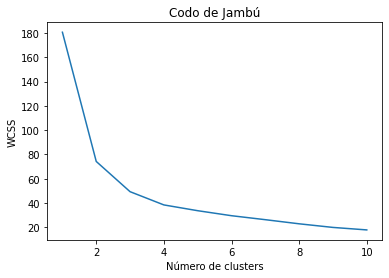

In [ ]:
#Graficaremos los resultados de WCSS para formar el codo de Jambú
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show

**Aplicando el metodo K-means a la base de datos**

In [ ]:
#Crear el modelo
clustering =KMeans(n_clusters=3, max_iter=300)
clustering.fit(df_norm)

KMeans(n_clusters=3)

**Agregando la calsificacion al archivo original**

In [ ]:
df_norm["Cluster"] = clustering.labels_
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pclass,Age,SibSp,Parch,Fare,Cluster
0,1.0,0.271174,0.125,0.000000,0.014151,2
1,0.0,0.472229,0.125,0.000000,0.139136,1
2,1.0,0.321438,0.000,0.000000,0.015469,2
3,0.0,0.434531,0.125,0.000000,0.103644,1
4,1.0,0.434531,0.000,0.000000,0.015713,2
...,...,...,...,...,...,...
885,1.0,0.484795,0.000,0.833333,0.056848,2
886,0.5,0.334004,0.000,0.000000,0.025374,0
887,0.0,0.233476,0.000,0.000000,0.058556,1
889,0.0,0.321438,0.000,0.000000,0.058556,1


**Visualizando los clusters que se formaron**

In [ ]:
#Analisis de componentes principales 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_df= pca.fit_transform(df_norm)
pca_dfDF=pd.DataFrame(data=pca_df, columns=["Comp_1", "Comp_2","Comp_3"])
pca_completo=pd.concat([pca_dfDF, df_norm[["Cluster"]]],axis=1)

pca_completo

,Comp_1,Comp_2,Comp_3,Cluster
0,-0.837252,-0.107005,0.004494,2.0
1,0.463458,0.495292,0.019069,1.0
2,-0.833276,-0.092996,-0.081095,2.0
3,0.460477,0.480225,0.040917,1.0
4,-0.827472,-0.067253,-0.166274,2.0
...,...,...,...,...
885,NaN,NaN,NaN,2.0
886,NaN,NaN,NaN,0.0
887,NaN,NaN,NaN,1.0
889,NaN,NaN,NaN,1.0


TypeError: ignored

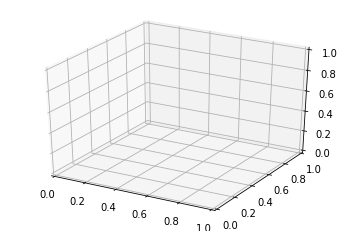

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_completo[:,0], pca_completo[:,1], pca_completo[:,2], c=["blue", "red", "green"])
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=pca_completo[:,0], y=pca_completo[:,1], z=pca_completo[:,2],
              color=y, size_max=18)
#fig = px.scatter_3d( x=center[:,0], y=center[:,1], z=center[:,2],
#               size_max=18)
fig.show()

# fig = plt.figure(figsize=(6,6))

# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel("Componente 1", fontsize=15)
# ax.set_ylabel("Componente 2", fontsize=15)
# ax.set_zlabel("Componente 3", fontsize=15)
# ax.set_title("Componentes Principales", fontsize=15)

# color_theme=np.array(["blue", "red", "green"])
# ax.scatter(x=pca_completo.Comp_1, y=pca_completo.Comp_2, z=pca_completo.Comp_3,
#            c=color_theme[pca_completo.Cluster], s=50)

# plt.show()

In [ ]:
#Limpiaré mi dataset
df_variables
# df_def=df_train[['Fare', 'Age']]
df_def=df_variables.dropna()
print(df_def.isnull().sum())
print(df_def.shape)
# df_def

df_def.dtypes

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
(714, 5)


Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [ ]:
#Haremos el escalamiento

#Selecciono variables numericas
x_num = df_def.select_dtypes(include = np.number).columns
x_num

#Defino el procedimiento
num_tras = Pipeline(steps=[
    ('scaler',MinMaxScaler(feature_range=(0,1)))
])

preprocesamiento = ColumnTransformer(
    transformers=[
        ('num',num_tras,x_num)
    ]
)
preprocesamiento


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])

In [ ]:
data_nparray= preprocesamiento.fit_transform(df_def)
print(type(data_nparray))
print(data_nparray.shape)

X5 = pd.DataFrame(data_nparray, columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
X5

<class 'numpy.ndarray'>
(714, 5)


,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.2,0.000000,0.014151
1,0.0,0.472229,0.2,0.000000,0.139136
2,1.0,0.321438,0.0,0.000000,0.015469
3,0.0,0.434531,0.2,0.000000,0.103644
4,1.0,0.434531,0.0,0.000000,0.015713
...,...,...,...,...,...
709,1.0,0.484795,0.0,0.833333,0.056848
710,0.5,0.334004,0.0,0.000000,0.025374
711,0.0,0.233476,0.0,0.000000,0.058556
712,0.0,0.321438,0.0,0.000000,0.058556


In [ ]:
X5.iloc[:,0]

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
709    1.0
710    0.5
711    0.0
712    0.0
713    1.0
Name: Pclass, Length: 714, dtype: float64

In [ ]:

ax = fig.add_subplot(projection='3d')

In [ ]:
#Con dos características (N_FEATURES=2) y 2 categorías (CENTERS=2)
X6 = X5[['Age', 'Fare']]
print(type(X6))

<class 'pandas.core.frame.DataFrame'>


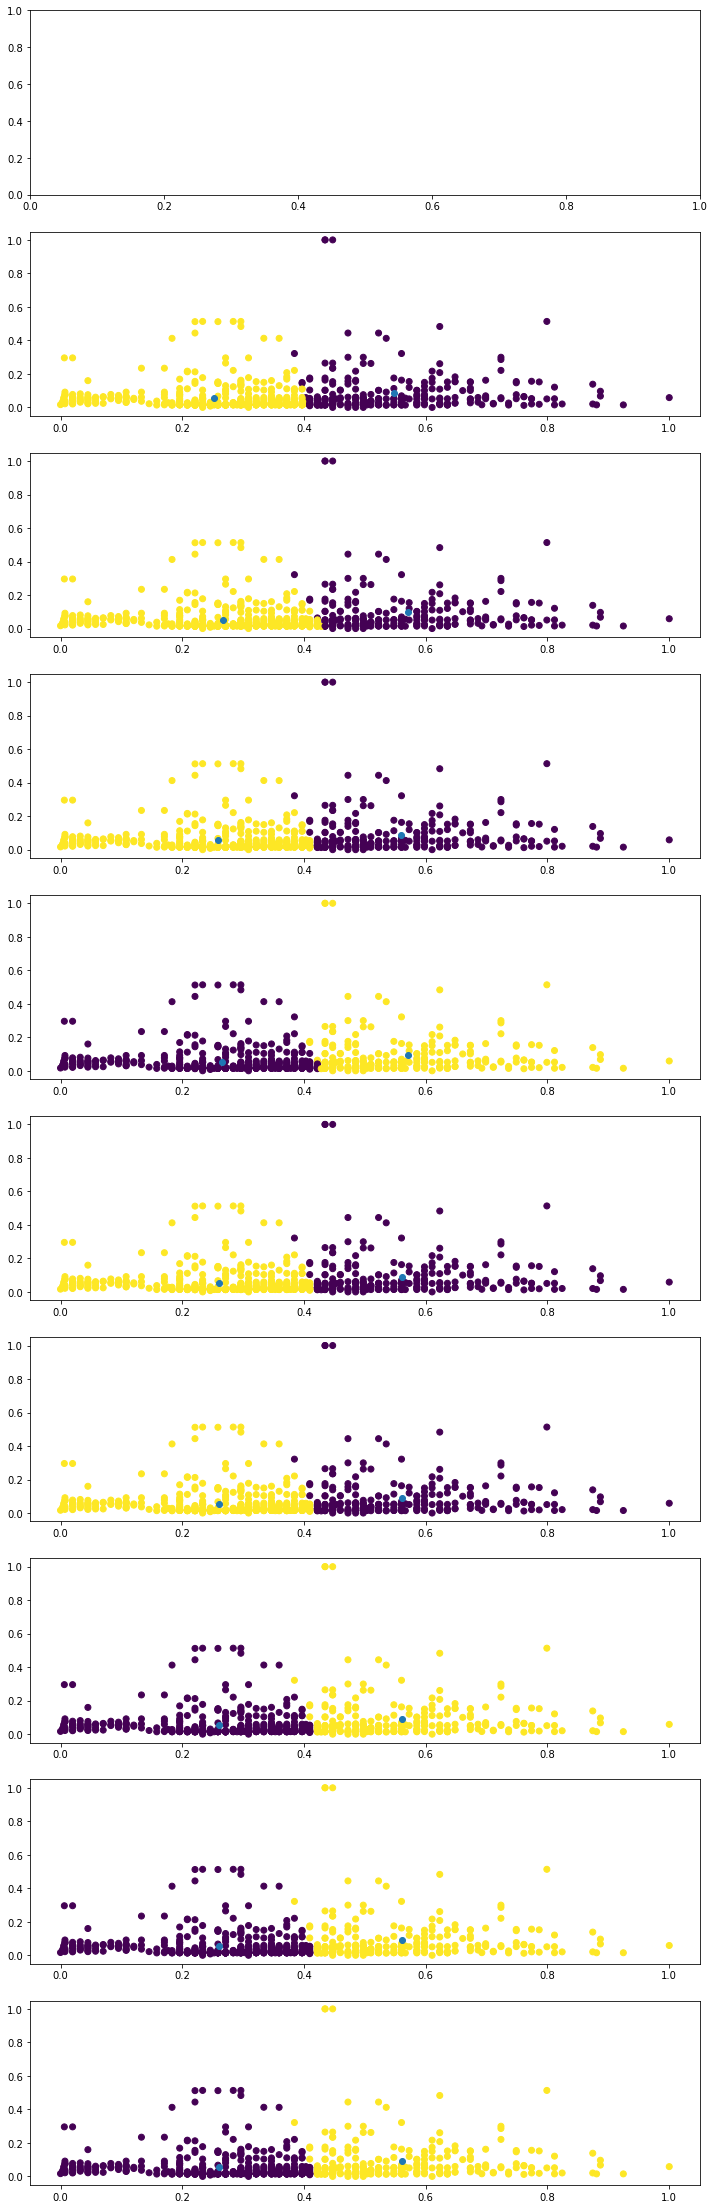

In [ ]:
#Con dos características (N_FEATURES=2) y 2 categorías (CENTERS=2)
fig,axs = plt.subplots(10,1, figsize = (12,40))  #[Solo una columna de gráficas]

for i in range(1,10):
  kmeans_cluster = KMeans(n_clusters = 2, max_iter= i,
                          init='random')
  clusters6 = kmeans_cluster.fit_predict(X6)
  center6 = kmeans_cluster.cluster_centers_
  clusters6

  axs[i].scatter(X6.iloc[:,0],X6.iloc[:,1],c = clusters6)
  axs[i].scatter(center6[:,0],center6[:,1])  

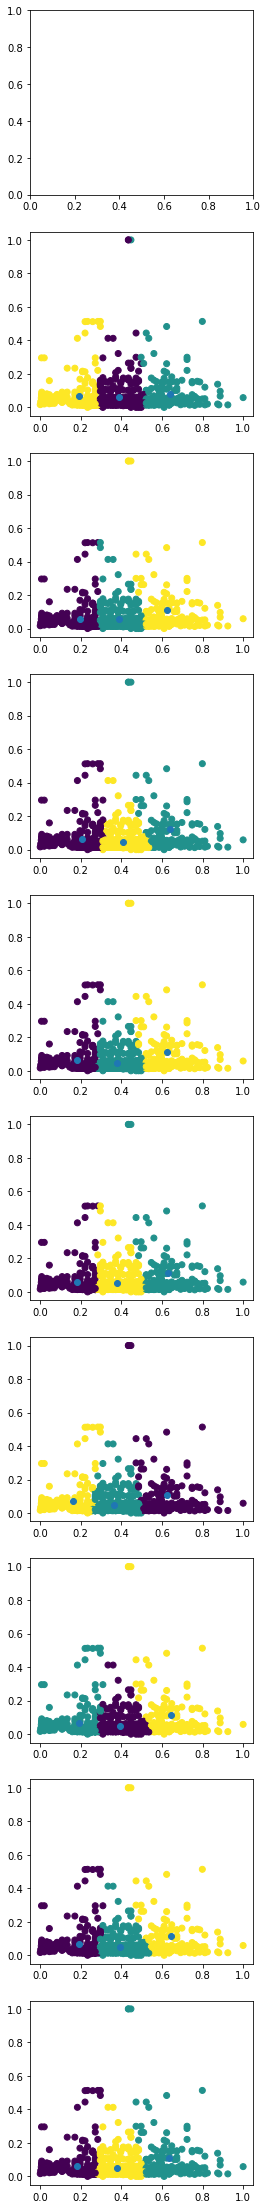

In [ ]:
#Con dos características (N_FEATURES=2) y 3 categorías (CENTERS=3)

fig,axs = plt.subplots(10,1, figsize = (4,40))#[1 ESPACIO]

for i in range(1,10):
  kmeans_cluster = KMeans(n_clusters = 3, max_iter= i,
                          init='random')
  clusters7 = kmeans_cluster.fit_predict(X6)
  center7 = kmeans_cluster.cluster_centers_
  clusters7

  axs[i].scatter(X6.iloc[:,0],X6.iloc[:,1],c = clusters7)
  axs[i].scatter(center7[:,0],center7[:,1])  

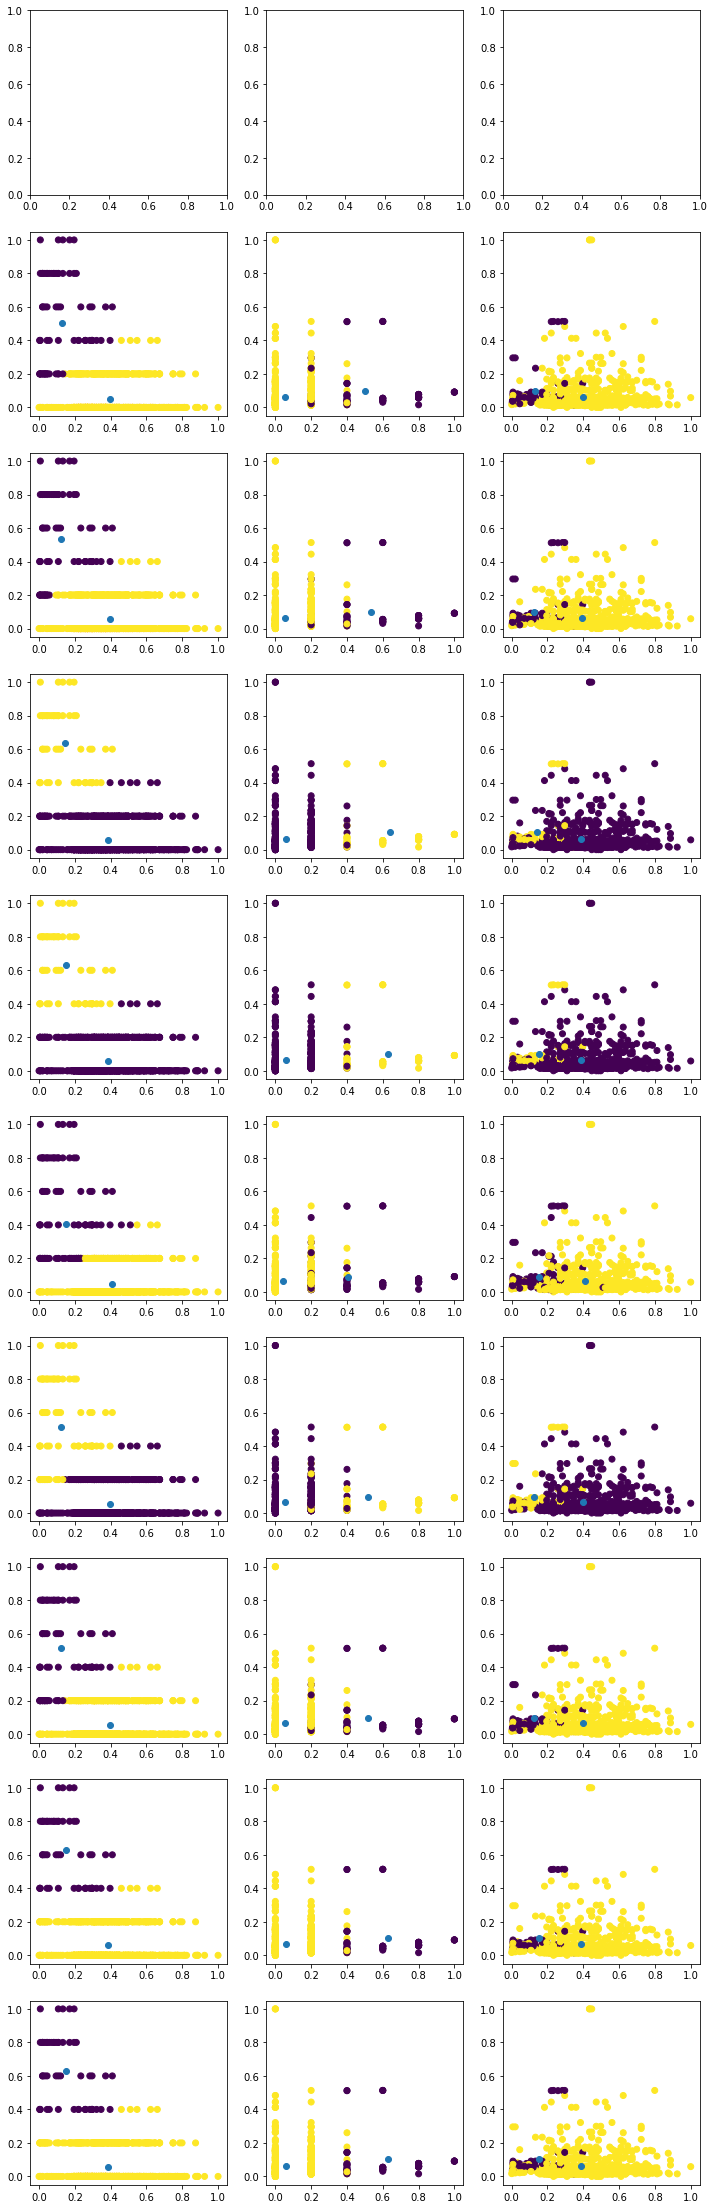

In [ ]:
#Con TRES características (N_FEATURES=3) y 2 categorías (CENTERS=2)
X8 = X5[['Age', 'SibSp','Fare']]

fig,axs = plt.subplots(10,3, figsize = (12,40))  #[3 columnas de gráficas]

for i in range(1,10):
  kmeans_cluster = KMeans(n_clusters = 2, max_iter= i,
                          init='random')
  clusters8 = kmeans_cluster.fit_predict(X8)
  center8 = kmeans_cluster.cluster_centers_
  clusters8

  axs[i][0].scatter(X8.iloc[:,0],X8.iloc[:,1],c = clusters8)
  axs[i][0].scatter(center8[:,0],center8[:,1]) 
  axs[i][1].scatter(X8.iloc[:,1],X8.iloc[:,2],c = clusters8)
  axs[i][1].scatter(center8[:,1],center8[:,2])  
  axs[i][2].scatter(X8.iloc[:,0],X8.iloc[:,2],c = clusters8)
  axs[i][2].scatter(center8[:,0],center8[:,2])

In [ ]:
y=df_train[["Survived","Age"]]
y=y.dropna()
#print(y.isnull().sum())
#len(y)
print(type(center8))

<class 'numpy.ndarray'>


Text(0.5, 0, 'Fare')

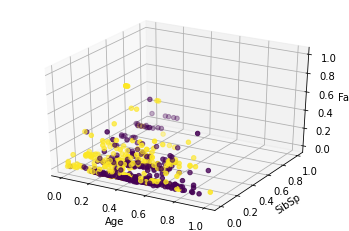

In [ ]:
#GRAFICA 3D con datos de TRES características (N_FEATURES=3) y 3 categorías (CENTERS=2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X8.iloc[:,0], X8.iloc[:,1], X8.iloc[:,2], c=y.iloc[:,0])
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=X8.iloc[:,0], y=X8.iloc[:,1], z=X8.iloc[:,2],
                    color=y.iloc[:,0])
fig = px.scatter_3d( x=center8[:,0], y=center8[:,1], z=center8[:,2])

ax.set_xlabel("Age")
ax.set_ylabel("SibSp")
ax.set_zlabel("Fare")
#plt.colorbar(fig)
#fig.show()